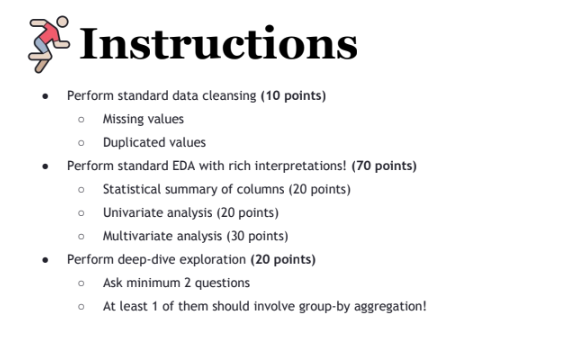

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [6]:
# adjust the path accordingly
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exploratory/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
#exclude rows with TotalCharges columns contain with space
df=df.loc[~df['TotalCharges'].str.contains(' ')]

`Note`
after checking dataset again, the code above make null value droped in TotalCharges .

So, total rows is 7043 with 11 missing row in TotalCharges column, for next future use this code instead:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
#transform Total Charger col to float
df['TotalCharges']=df['TotalCharges'].astype(float)

#  Preliminary Look and Data Cleansing

## Sample of data

In [ ]:
# Showing top 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Terdapat Coloumyg yg tidak terlihat
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [ ]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
931,0454-OKRCT,Male,0,No,No,33,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),80.60,2651.10,No
3274,2874-YXVVA,Female,0,No,No,34,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.10,3634.80,No
2607,5539-TMZLF,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.75,69.75,Yes
246,0303-UNCIP,Male,0,No,No,41,Yes,Yes,DSL,No,No,Yes,No,No,Yes,One year,No,Mailed check,65.00,2531.80,No
5864,5093-FEGLU,Female,0,Yes,No,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.65,921.55,No
1122,4081-DYXAV,Female,0,No,No,19,No,No phone service,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),44.85,893.55,Yes
5559,6339-DKLMK,Female,0,No,No,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,31.65,389.95,No
1696,8593-WHYHV,Male,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.30,264.80,Yes
932,5787-KXGIY,Male,0,Yes,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.30,1304.80,No
6354,3214-IYUUQ,Female,0,Yes,No,61,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,No,Bank transfer (automatic),93.70,5860.70,No


Observations:
1. All columns, except `SeniorCitizen, Tenure,MonthlyCharges,TotalCharges` column, are object
2. `PhoneService,PaperlessBilling,Churn` column seems to contain two distinct values (yes OR no), but will confirm later
3. `SeniorCitizen` is apparently binary (0,1)
4. `MultipleLines, InternetService, OnlineSecurity, OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies` column have contain other than two distinct values
5. No obvious defect on the data (column name vs its entries), all looks good

## General Information & Missing Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Observation:
1. Data contains 21 columns with 7032 rows
2. Seem like no missing vallue, will be check later
3. All dtypes seem OK (appropriate), given the corresponding column name

In [21]:
# number of missing values per column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# percentage version
df.isna().sum() * 100 / len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

di bawag 5 persen

In [23]:
# Portion missing values considering all columns
((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100

0.0

keseluruhan kolom 10 persen sebagai batas

There are no missing vallue, next to check duplicate

## Duplicated data check

In [24]:
# number of duplicated data
df.duplicated().sum()

0

There are no duplicated rows.

# Data understanding

## Statistical summary

In [ ]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: object(17)


In [7]:
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7032 non-null   int64  
 1   tenure          7032 non-null   int64  
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 274.7 KB


In [72]:
# group column names based on type
# it will make our life easier onwards
categoricals = [ 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup' , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

numericals = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [26]:
# numerical statistical sumary
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
# value counts discrete columns
cols = ['SeniorCitizen', 'tenure','MonthlyCharges']
for col in cols:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of tenure column
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 

Value counts of MonthlyCharges column
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64 



Observation:
* Overall, the minimum and maximum values make sense for each column
* `SeniorCitizen` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity. As this can be a target variable for modelling, we will inspect the balance-level later.
* `tenure` column is discrete values with many unique values.
* Mean ~ 50% (Median) in `SeniorCitizen` column, indicating somewhat a symmetrical distribution

In [28]:
# describe method on categorical data
df[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observations:
* `PhoneService`, `PaperlessBilling`, and `Churn have 2 unique value, 'yes', and 'no'
*   `MultipleLines, InternetService, OnlineSecurity, OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies` have 3 uniqe vlaue, but except `InternetService` have same value with No value

In [24]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  if col != "customerID" :
    print(f"Value counts of {col} column")
    print(df[col].value_counts(), '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

Value counts of DeviceProtection column
N

# Univariate Analysis

## Boxplot to detect outliers

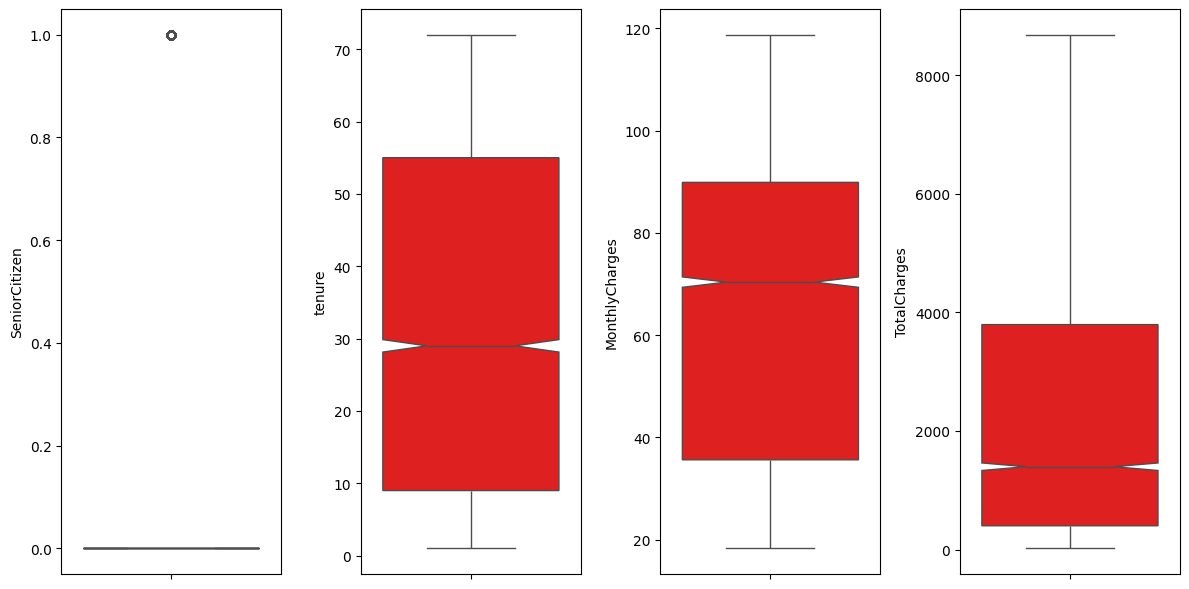

In [11]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red',notch=True,vert=True)
    plt.tight_layout()

In [ ]:
# check the outlier full profile
outlier = df['SeniorCitizen'].max()

df[df['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


Obervation:
1. There is 1142 outlier in the `SeniorCitizien` column (value = 1)
2. But the value is needed, hence no need to handle speficically


## KDE plot for knowing the distribution form

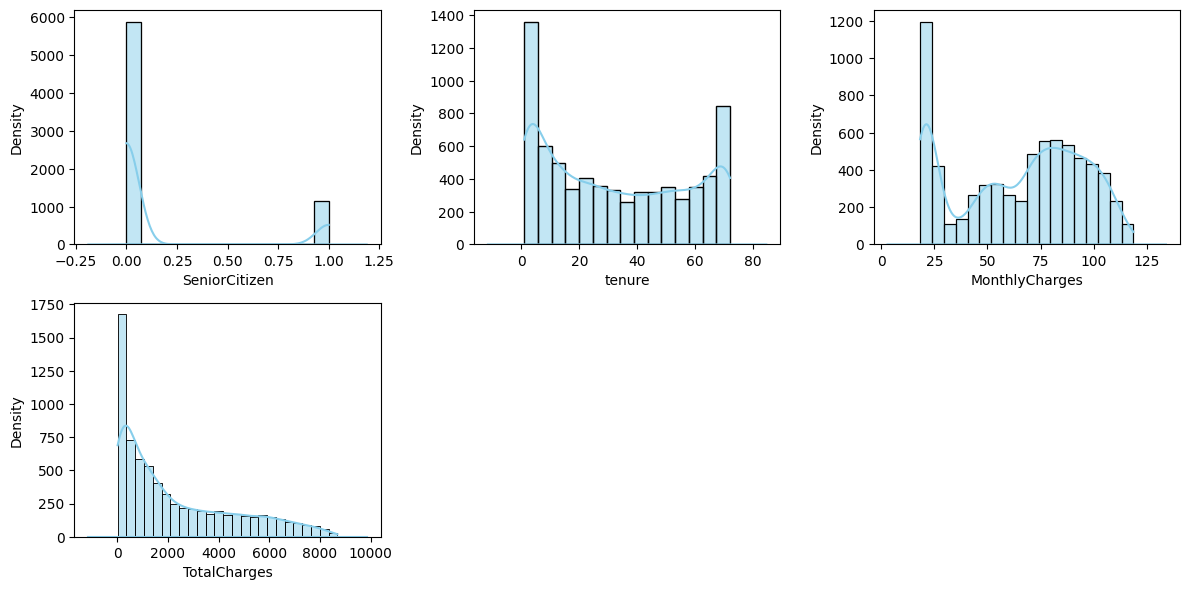

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    sns.histplot(x=df[features[i]], color='skyblue', kde=True) # revised, histogram + kde
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. the seniorcitizen distribution is bimodal because only have 2 value and in box plot, it is said that there is an outlayer is the elderly. but because to pay attention to all consumers can be ignored for now
2. in tenure, the diagram like bimodal, and it seems almost symmetrical. so we can continue to next column
3. in the graph it is almost a normal distribution but there is a high spike on the left side of the graph. In the future, these parts can be thrown away or stored as needed
4. In the total charger distribution graph, the right skewed histogram and the left side have a very big difference. This is because many users have low tenure and choose cheap packages

# Bivariate Analysis

In [68]:
#Make new column and ransform yes and no become 1 and 0
df['T,Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,MultipleLines'] = df['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,InternetService'] = df['InternetService'].apply(lambda x: 0 if x == 'No' else 1) #Make Fiber optic and DSL to 1
df['T,OnlineSecurity'] = df['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,OnlineBackup'] = df['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,DeviceProtection'] = df['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,TechSupport'] = df['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,StreamingTV'] = df['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,StreamingMovies'] = df['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
df['T,Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [29]:
# remember the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TransChurn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


<Axes: xlabel='Churn', ylabel='count'>

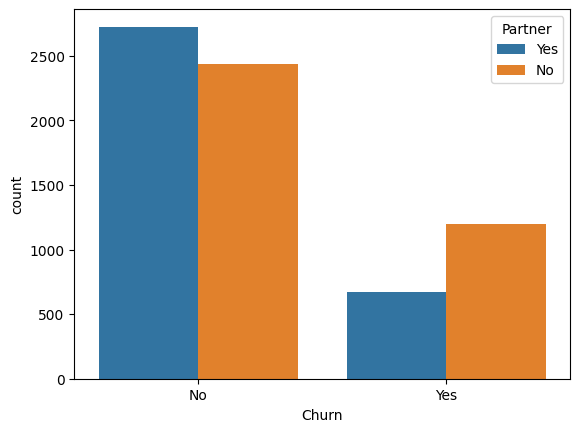

In [69]:
sns.countplot(data=df,
            x='Churn',
            hue='Partner'
            )

 We can say from that chart,  more single users stop using our service than users with partner

<ipython-input-40-e917ad11b3d6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

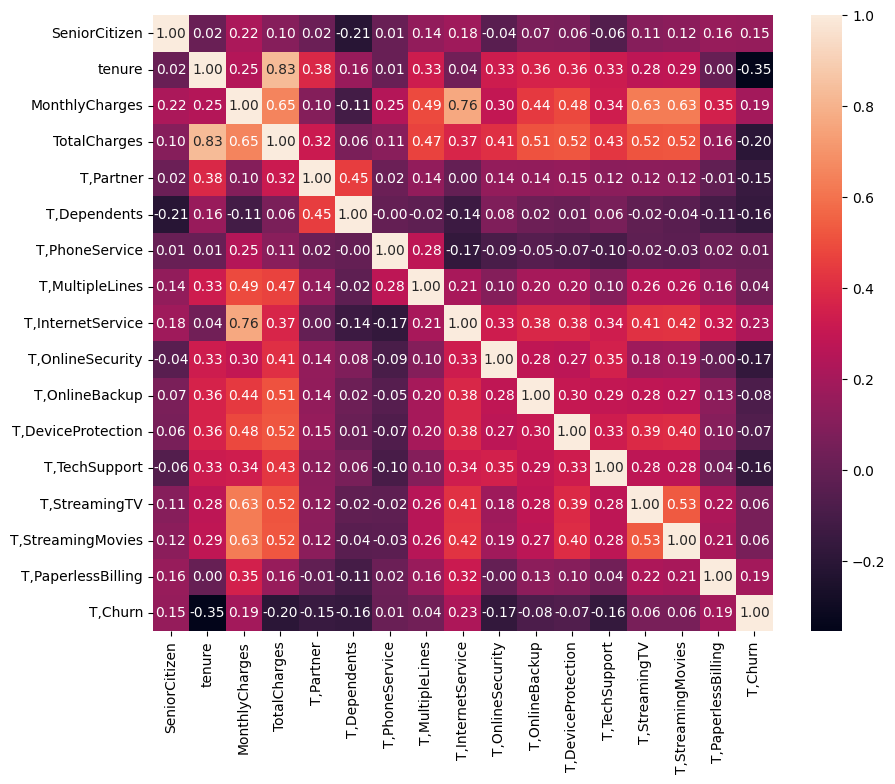

In [40]:
# correlation heatmap
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

1. `totalcharger`, and `tenure` are highly correlated each other
2. `MonthlyCharger` and `InternetService` appear to have little high correlation, and the cause is `StremingTV` and `StreamingMovies`

In [70]:
#Drop When done or column not needed
df.drop('T,Partner',axis=1, inplace=True)
df.drop('T,Dependents',axis=1, inplace=True)
df.drop('T,PhoneService',axis=1, inplace=True)
df.drop('T,MultipleLines',axis=1, inplace=True)
df.drop('T,InternetService',axis=1, inplace=True)
df.drop('T,OnlineSecurity',axis=1, inplace=True)
df.drop('T,OnlineBackup',axis=1, inplace=True)
df.drop('T,DeviceProtection',axis=1, inplace=True)
df.drop('T,TechSupport',axis=1, inplace=True)
df.drop('T,StreamingTV',axis=1, inplace=True)
df.drop('T,StreamingMovies',axis=1, inplace=True)
df.drop('T,PaperlessBilling',axis=1, inplace=True)
df.drop('T,Churn',axis=1, inplace=True)

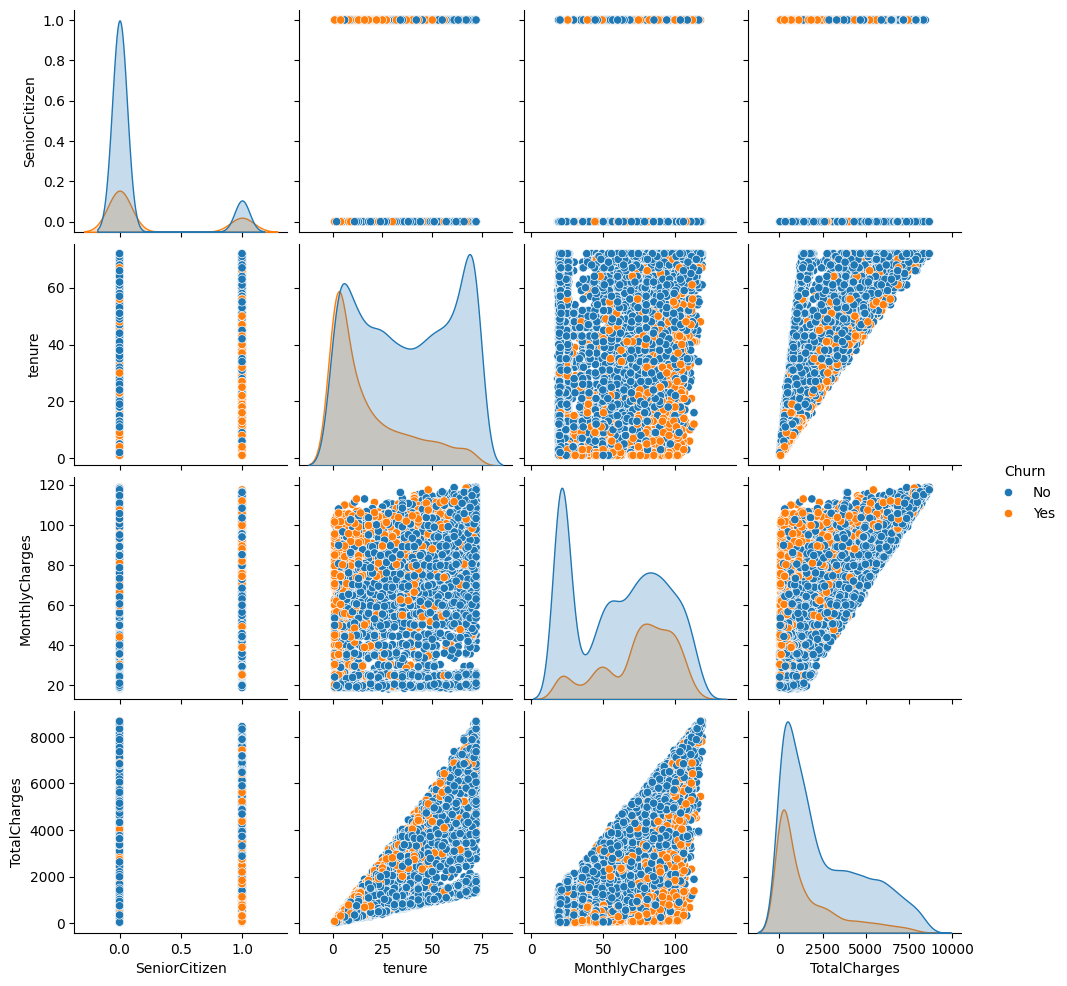

In [49]:
# pairplot of the data
sns.pairplot(df, hue='Churn')

Observation
1. `tenure`,`NonthlyCharge`, and `TotalCharges`havepositive relationship witheach other.


# EDA Conclusion
1. The data does not contain major issues. There are only some NULL values and duplicated rows. We've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with continuous numerical values are somewhat symmetric already.
4. From the boxplot we can see outlier in `recommendation_strength` column. But it makes sense, because the min and max value are 1 and 5, the outlier is at "1", and it's possible (no need to drop)
5. In terms of the target variable, `admit_status = 1` is more frequent in the dataset. But, the imbalance condition is NOT severe (still OK)
6. From barcharts of `admit_status` and `research_exp` column,  We can say that, applicants with research experience is more likely to be admitted.
7. From correlation heatmap: We can see that `gre_score` is correlated with `gpa` and `toefl_score`. We can choose either of them for modelling.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Deep Dive

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA Questions
1. What are Top PhoneService?
2. What are Top 10 InternetService with the most User?
3. Demographic Customer
4. Churn

## Top Phone Service




In [95]:
df.groupby(['PhoneService','MultipleLines']).agg(
    Count= ('MultipleLines','count')
).reset_index().sort_values('Count',ascending=False)

,PhoneService,MultipleLines,Count
1,Yes,No,3385
2,Yes,Yes,2967
0,No,No phone service,680


<Axes: xlabel='PhoneService', ylabel='count'>

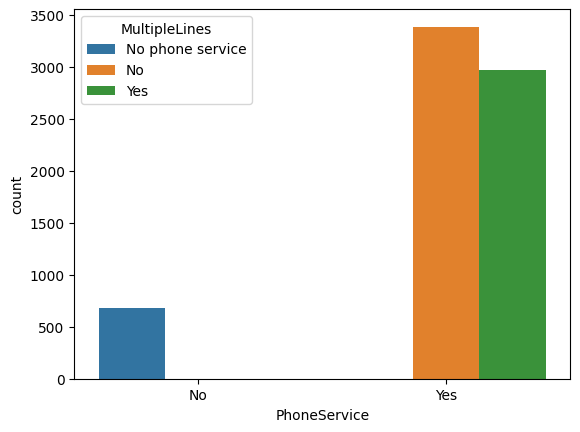

In [64]:
# visualize it
sns.countplot(data=df,
            x='PhoneService',
            hue='MultipleLines'
            )

user more like use phone service without multiplelane than with it

## Top Internet Service

In [47]:
melt_top=df.melt(id_vars=['InternetService'],
        value_vars=['OnlineSecurity', 'OnlineBackup' , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
        var_name='Service',
        value_name='User')
melt_top['User'] = (melt_top['User'] == 'Yes').astype(int)

melt_top = melt_top.groupby(['InternetService', 'Service'])['User'].sum().reset_index().sort_values('User',ascending=False)
melt_top.head(10)

,InternetService,Service,User
9,Fiber optic,StreamingMovies,1751
10,Fiber optic,StreamingTV,1750
6,Fiber optic,DeviceProtection,1357
7,Fiber optic,OnlineBackup,1343
2,DSL,OnlineSecurity,1176
5,DSL,TechSupport,1174
1,DSL,OnlineBackup,1082
0,DSL,DeviceProtection,1061
3,DSL,StreamingMovies,980
4,DSL,StreamingTV,953


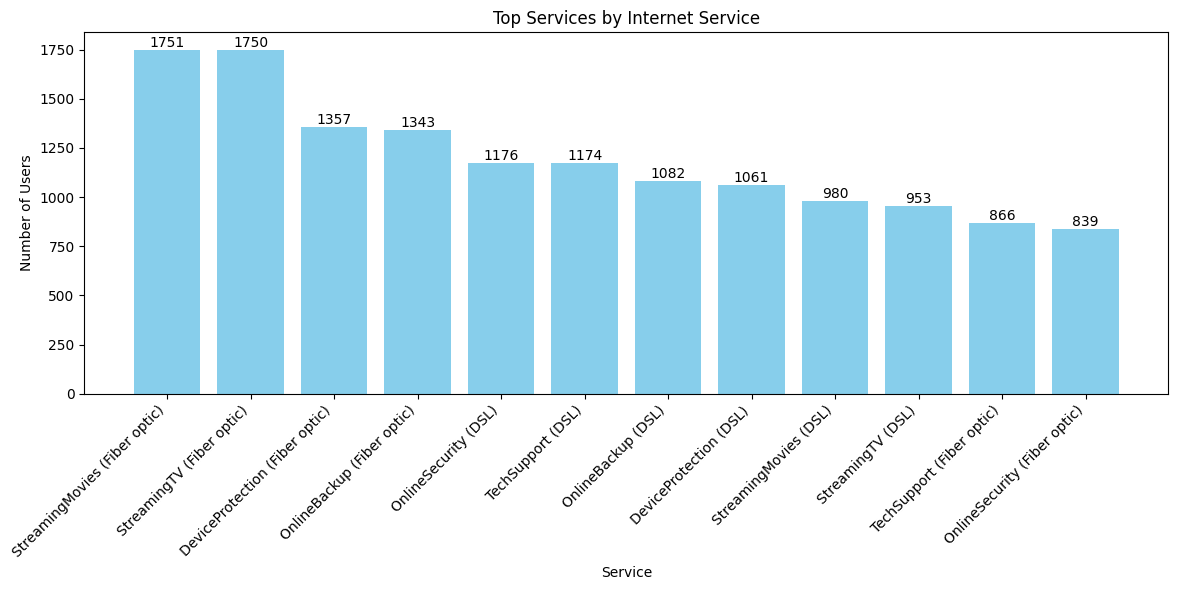

In [63]:
# visualize it
graph_top = melt_top[melt_top['User'] != 0]
plt.figure(figsize=(12, 6))
bars = plt.bar(graph_top['Service'] + ' (' + graph_top['InternetService'] + ')', graph_top['User'], color='skyblue')
plt.xlabel('Service')
plt.ylabel('Number of Users')
plt.title('Top Services by Internet Service')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.show()

1. user more like using `fiber optic` than` dsl` for `internet service`
2. problem in `fiber optic` is lower than `dsl`

## Payment Method

In [39]:
df.groupby(['gender','PaymentMethod']).agg(
    User= ('PaymentMethod','count')
).reset_index().sort_values(['gender','User'],ascending=[False,False])

,gender,PaymentMethod,User
6,Male,Electronic check,1195
7,Male,Mailed check,829
5,Male,Credit card (automatic),770
4,Male,Bank transfer (automatic),755
2,Female,Electronic check,1170
0,Female,Bank transfer (automatic),787
3,Female,Mailed check,775
1,Female,Credit card (automatic),751


<Axes: xlabel='PaymentMethod', ylabel='count'>

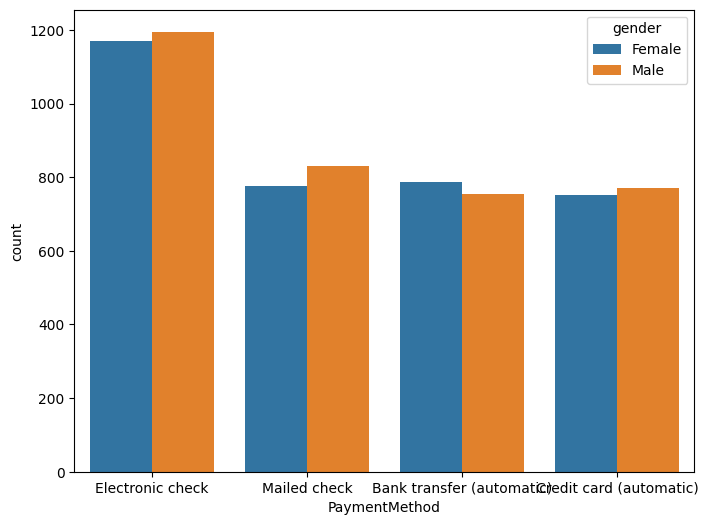

In [66]:
# visualize it
plt.figure(figsize=(8,6))
sns.countplot(data=df,
            x='PaymentMethod',
            hue=''
            )

1. `Electronic check` is the most popular `PaymentMethod`
2. `Female` more like use `bank transfer` than `male`

## Churn

churn monthly charge contract tenure

In [24]:
df_pivot = pd.pivot_table(df,
                           index='Churn',
                           columns=['PaymentMethod','Contract', 'PaperlessBilling'],
                           aggfunc='size',
                           fill_value=0)
df_pivot

PaymentMethod    Bank transfer (automatic)                                   \
Contract                    Month-to-month      One year      Two year        
PaperlessBilling                        No  Yes       No  Yes       No  Yes   
Churn                                                                         
No                                     151  237      160  193      270  273   
Yes                                     55  146       11   27        6   13   

PaymentMethod    Credit card (automatic)                                   \
Contract                  Month-to-month      One year      Two year        
PaperlessBilling                      No  Yes       No  Yes       No  Yes   
Churn                                                                       
No                                   116  249      161  196      298  269   
Yes                                   45  133       13   28        6    7   

PaymentMethod    Electronic check                                   \
Contract           Month-to-month      One year      Two year        
PaperlessBilling               No  Yes       No  Yes       No  Yes   
Churn                                                                
No                            265  591      100  183       54  101   
Yes                           188  806       14   50        2   11   

PaymentMethod      Mailed check                                   
Contract         Month-to-month      One year      Two year       
PaperlessBilling             No  Yes       No  Yes       No  Yes  
Churn                                                             
No                          351  260      204  109      265  107  
Yes                         118  164       10   13        1    2

1. Many users have stopped subscribing in electronic check payment with monthly contracts
2. less user stopped subscribing in mailed check with two year contract
3. most active user payment is electronic check with monthly contracts

# Cek Column

In [ ]:
aaa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exploratory/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
aaa['TotalCharges'] = pd.to_numeric(aaa['TotalCharges'], errors='coerce')

In [ ]:
aaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
aaa[aaa.isna().any(axis=1)]

In [ ]:
aaa.isna().sum()

In [ ]:
aaa.isna().sum() * 100 / len(aaa)

In [ ]:
aaa = aaa.dropna()

In [ ]:
aaa.info()

In [ ]:
numa = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
aaa[numa].describe()